In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
round1_dayn2 = pd.read_csv("trades_round_1_day_-2_wn.csv", sep=';')
round1_dayn1 = pd.read_csv("trades_round_1_day_-1_wn.csv", sep=';')
round1_day0 = pd.read_csv("trades_round_1_day_0_wn.csv", sep=';')

round1_dayn1["timestamp"] += 1000000
round1_day0["timestamp"] += 2000000

all_trades_data = pd.concat([round1_dayn2, round1_dayn1, round1_day0])

round1_dayn2 = pd.read_csv("prices_round_1_day_-2.csv", sep=';')
round1_dayn1 = pd.read_csv("prices_round_1_day_-1.csv", sep=';')
round1_day0 = pd.read_csv("prices_round_1_day_0.csv", sep=';')

round1_dayn1["timestamp"] += 1000000
round1_day0["timestamp"] += 2000000

all_prices_data = pd.concat([round1_dayn2, round1_dayn1, round1_day0])


In [4]:
amethysts_trades = all_trades_data[all_trades_data["symbol"] == "AMETHYSTS"]
starfruit_trades = all_trades_data[all_trades_data["symbol"] == "STARFRUIT"]

amethysts_prices = all_prices_data[all_prices_data["product"] == "AMETHYSTS"]
starfruit_prices = all_prices_data[all_prices_data["product"] == "STARFRUIT"]

starfruit_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5003.0,1
3,100,Ruby,Valentina,STARFRUIT,SEASHELLS,5004.0,6
4,900,Rhianna,Valentina,STARFRUIT,SEASHELLS,5001.0,2
5,1000,Vinnie,Ruby,STARFRUIT,SEASHELLS,4997.0,2
6,1100,Valentina,Remy,STARFRUIT,SEASHELLS,4997.0,1
...,...,...,...,...,...,...,...
5310,2998500,Vladimir,Amelia,STARFRUIT,SEASHELLS,5050.0,3
5311,2998700,Remy,Vladimir,STARFRUIT,SEASHELLS,5055.0,1
5312,2998800,Valentina,Remy,STARFRUIT,SEASHELLS,5050.0,1
5315,2999500,Valentina,Remy,STARFRUIT,SEASHELLS,5049.0,2


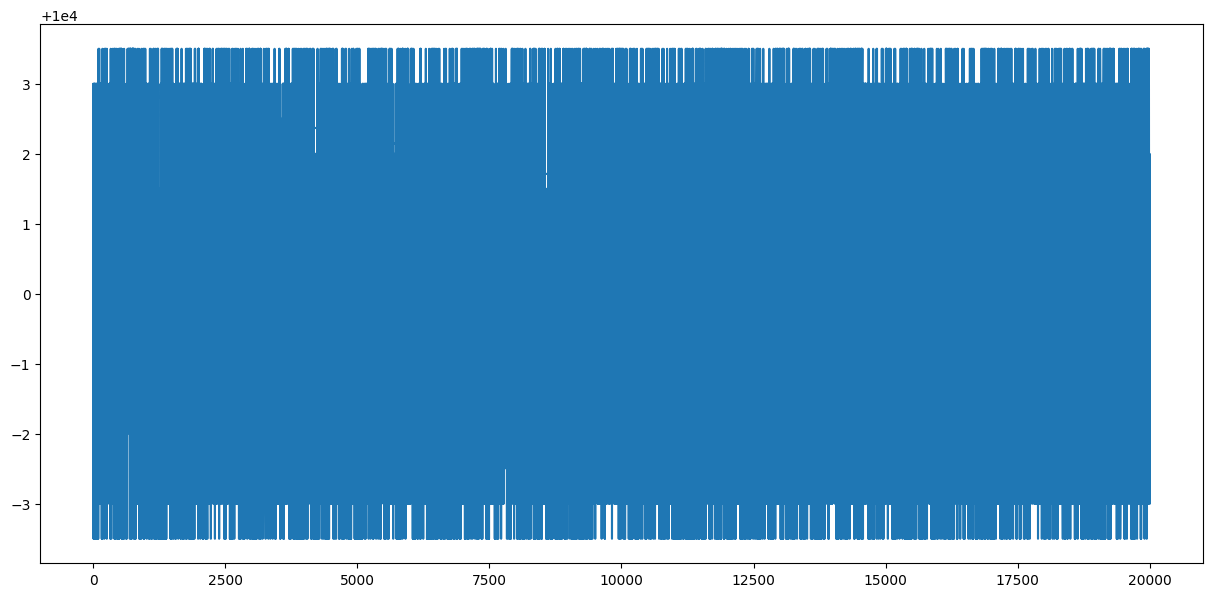

In [5]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.plot(amethysts_prices.index, amethysts_prices["mid_price"])

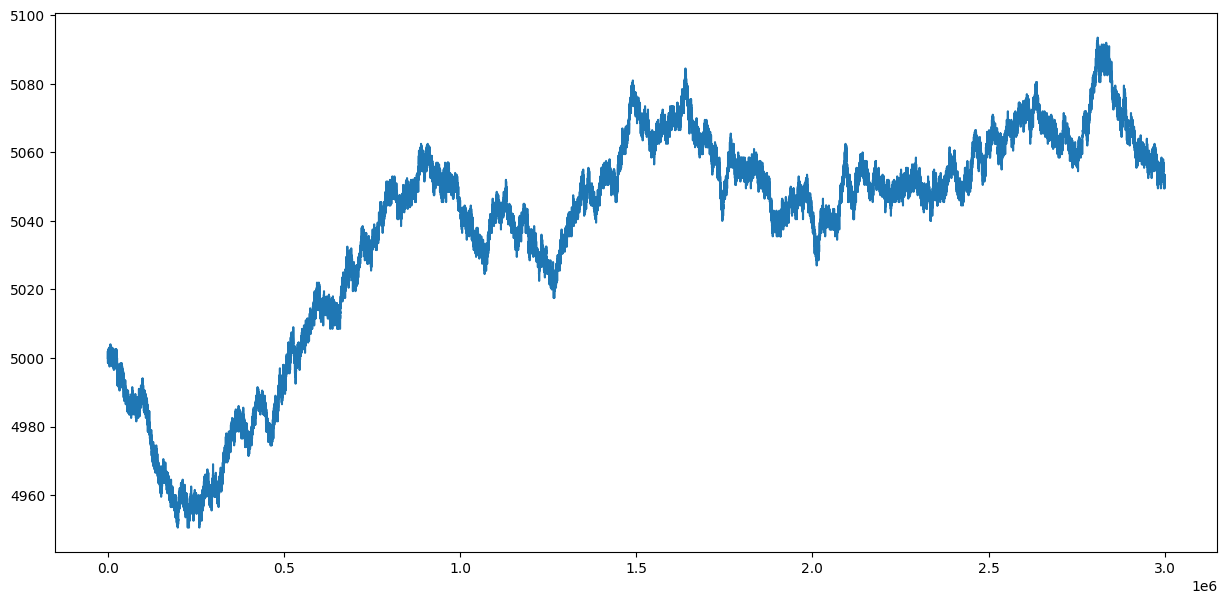

In [9]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.plot(starfruit_prices["timestamp"], starfruit_prices["mid_price"])

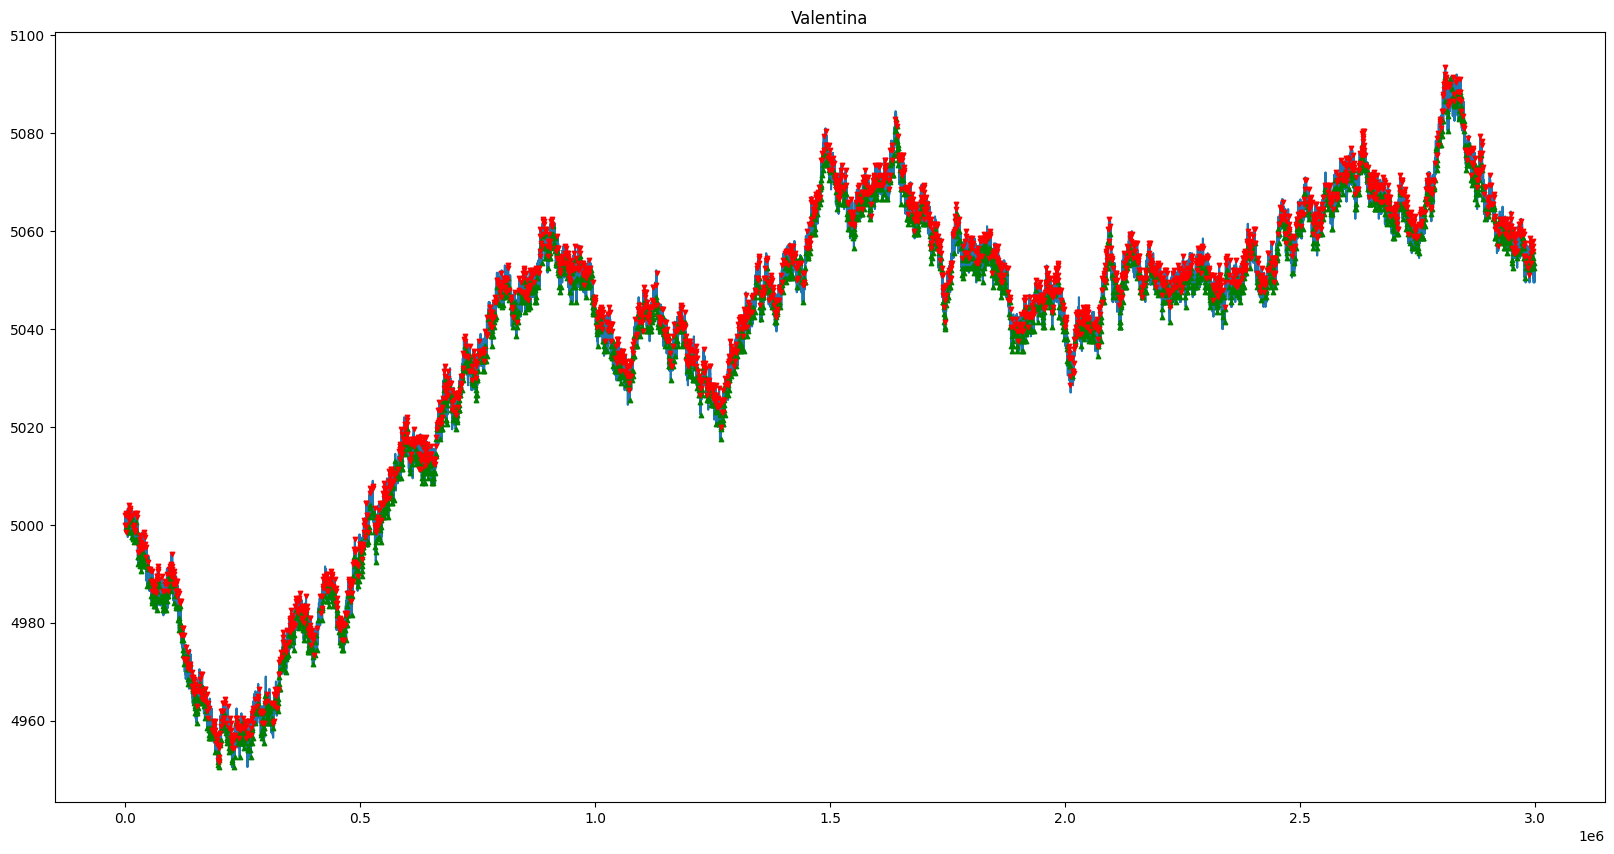

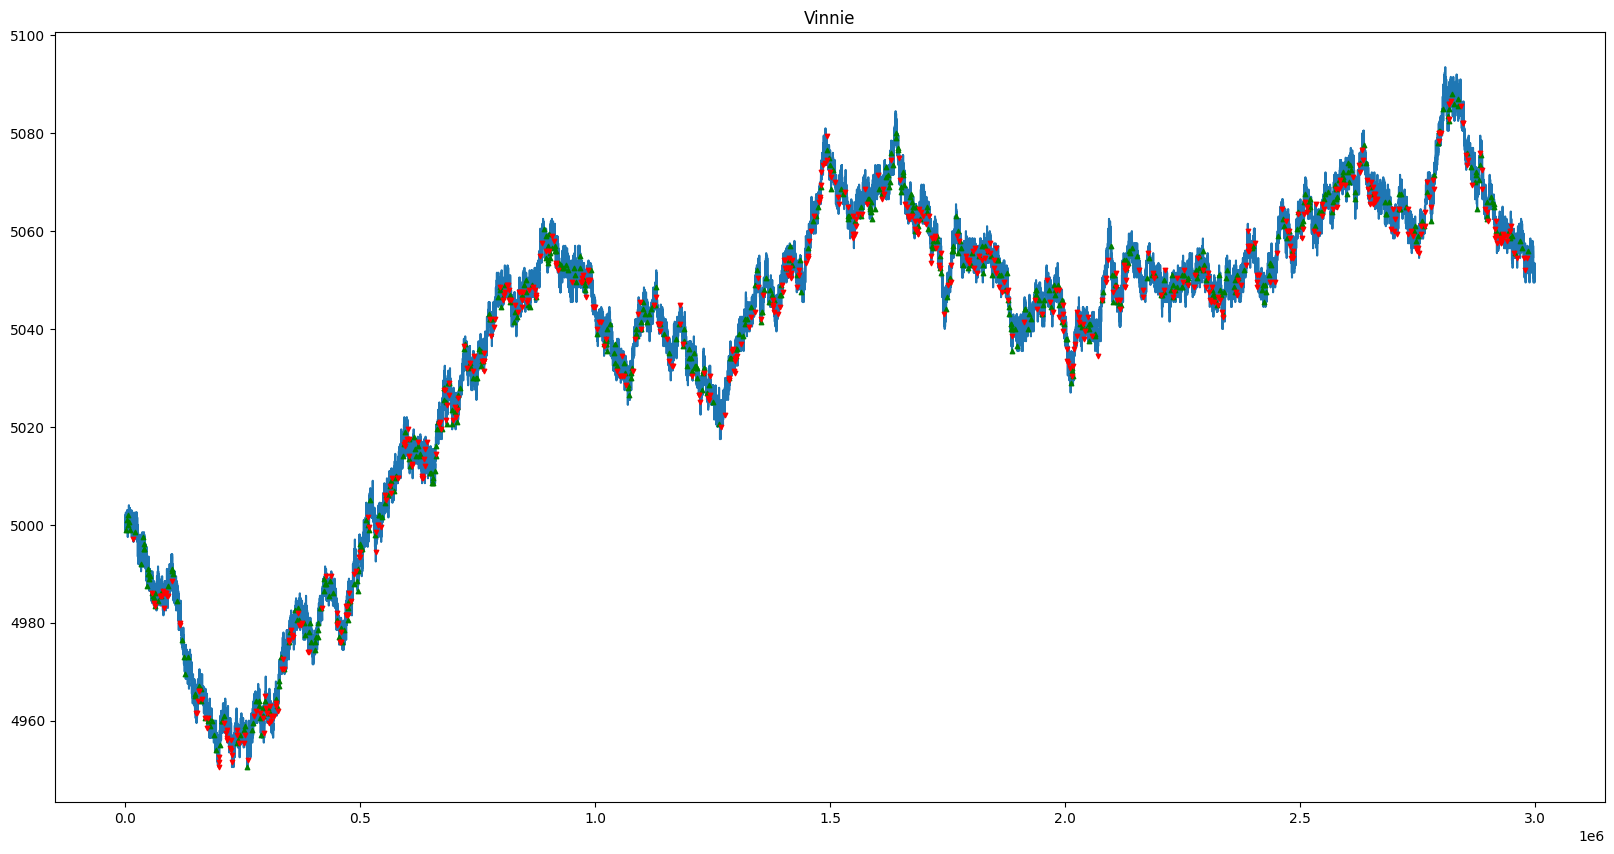

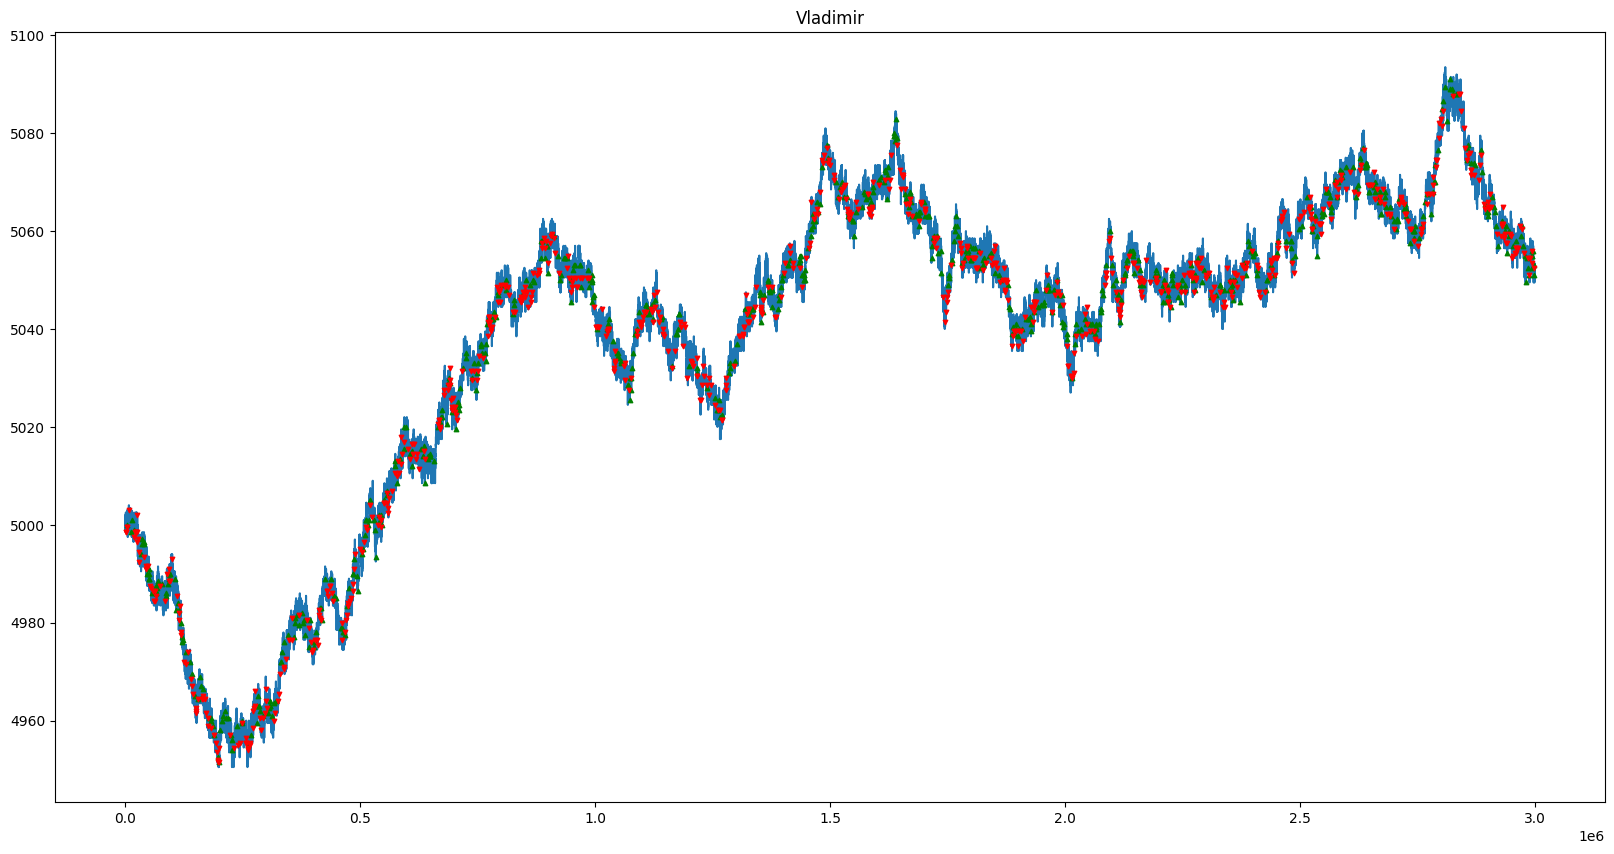

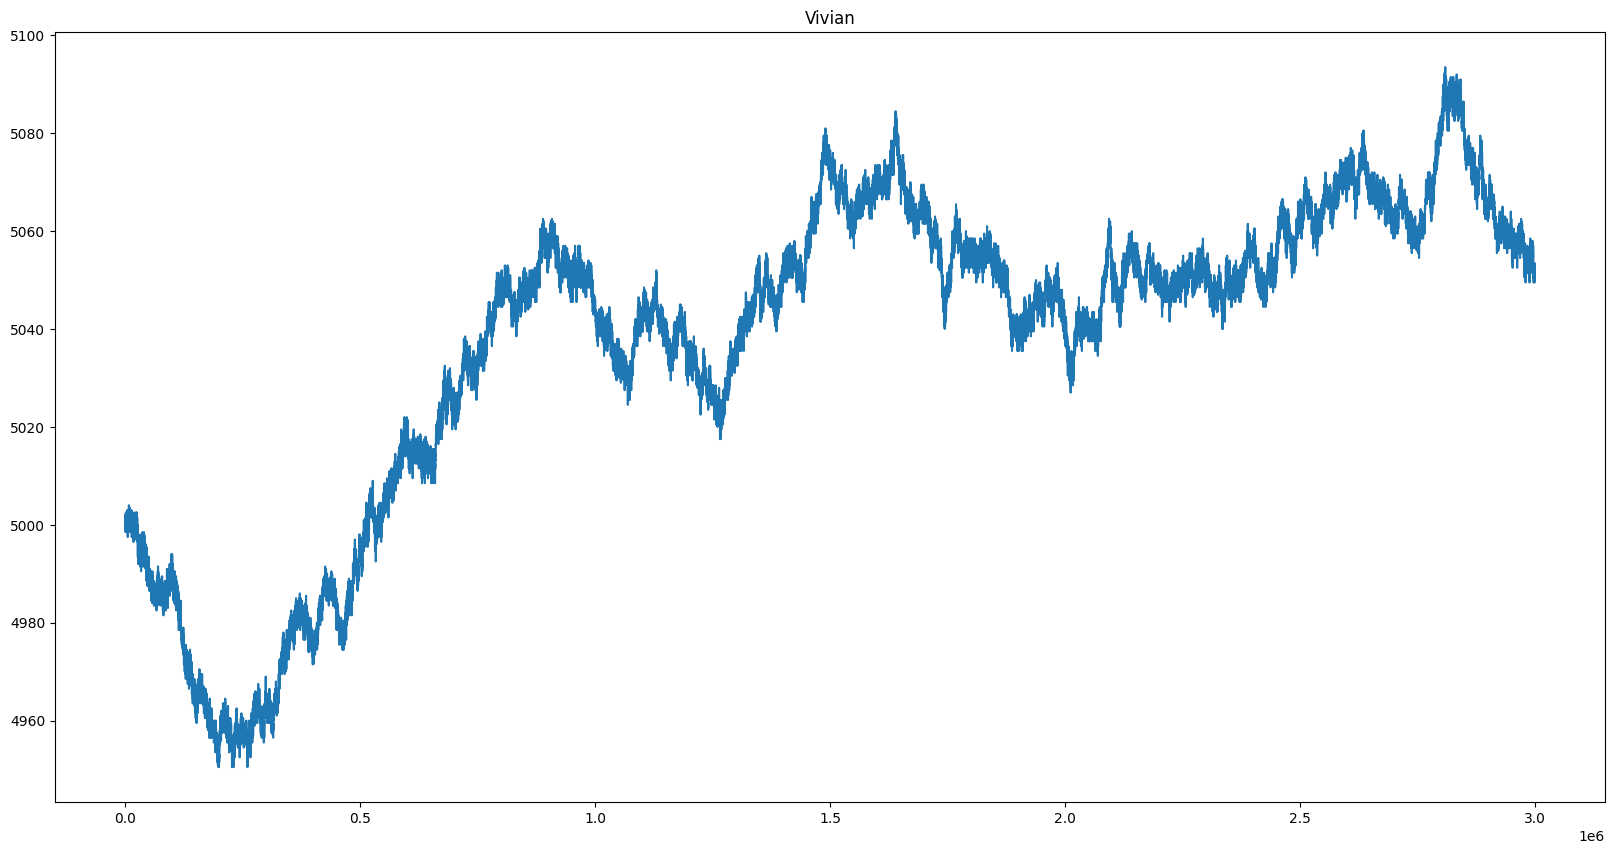

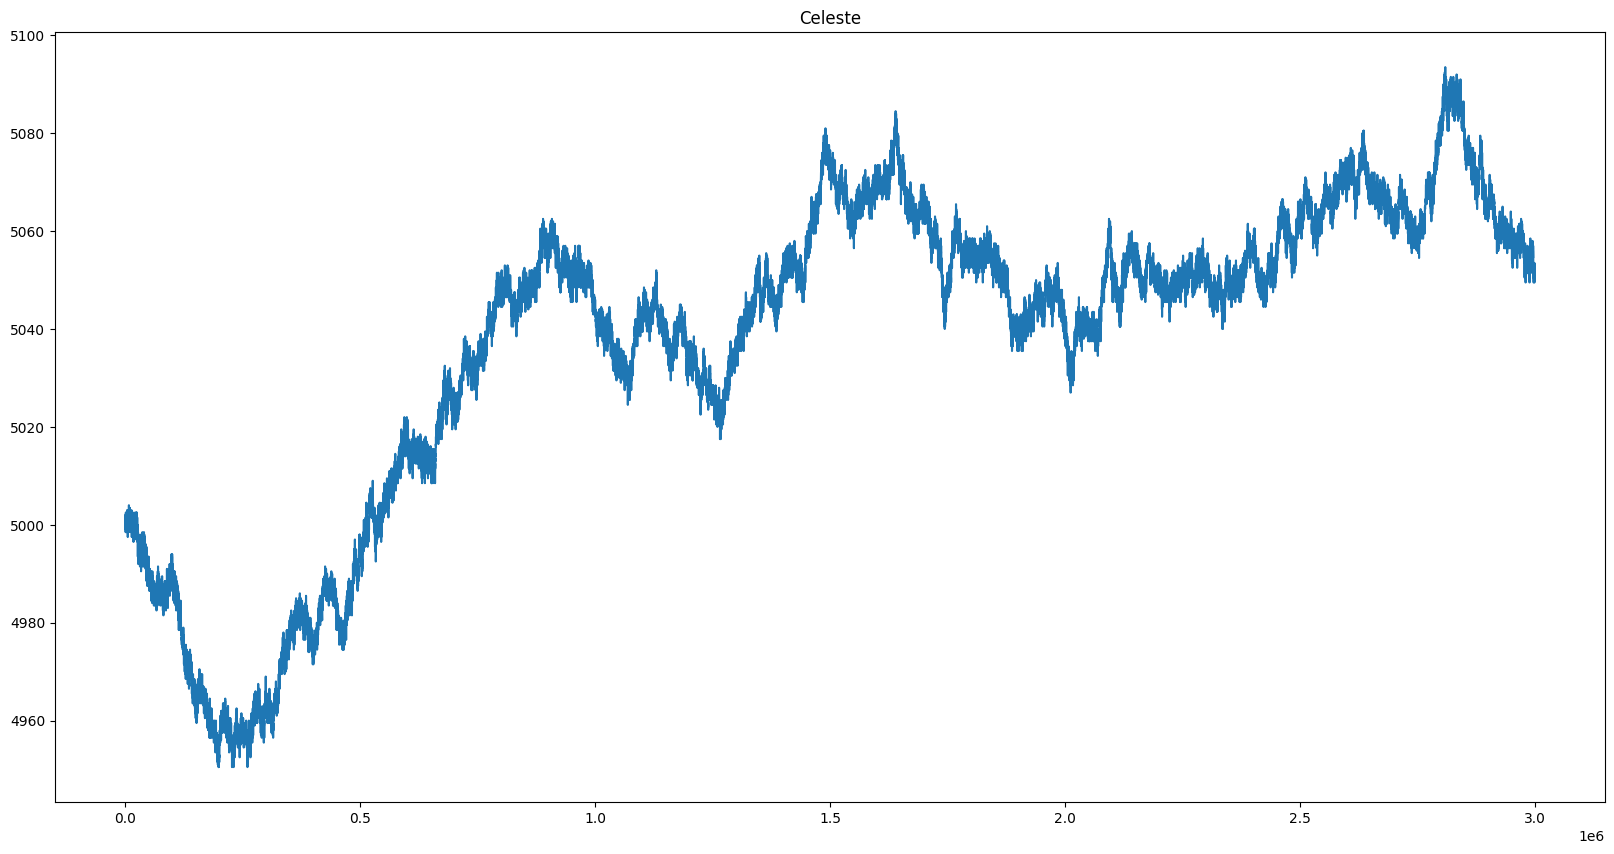

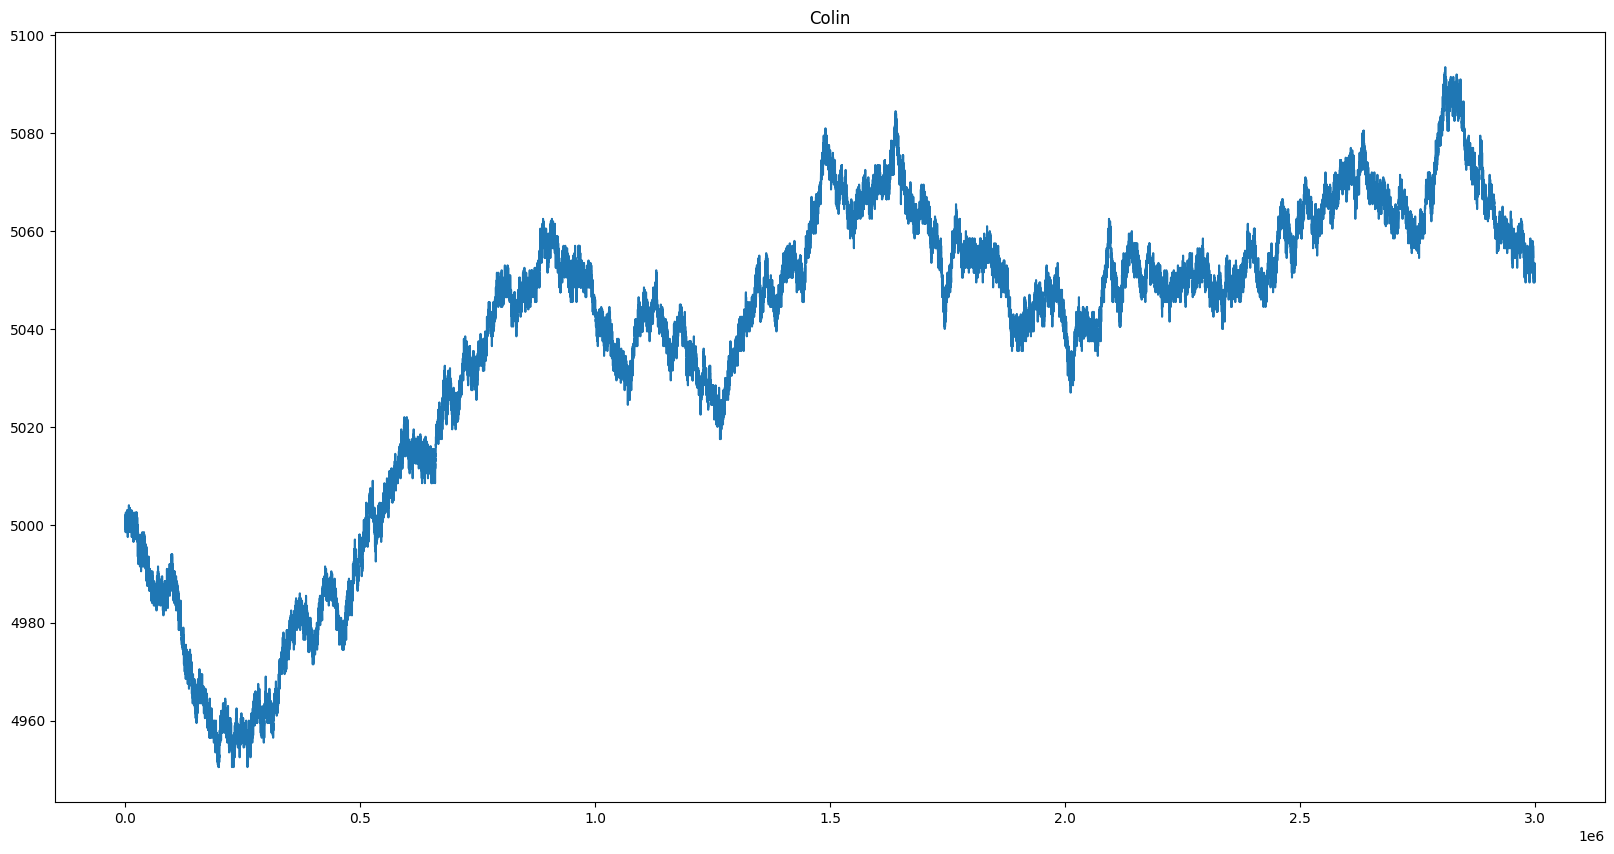

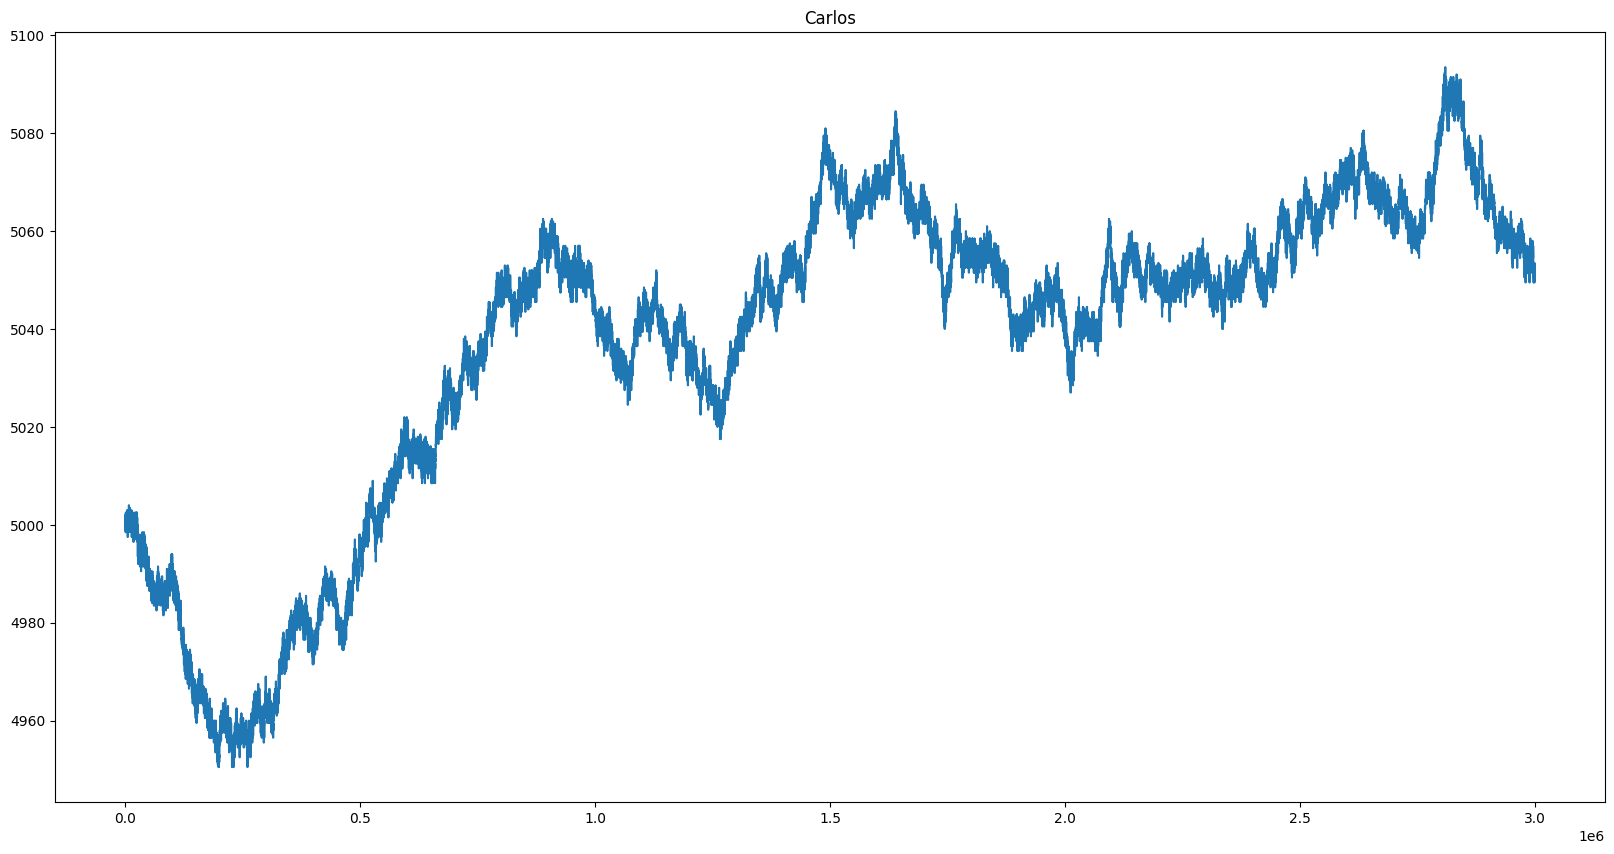

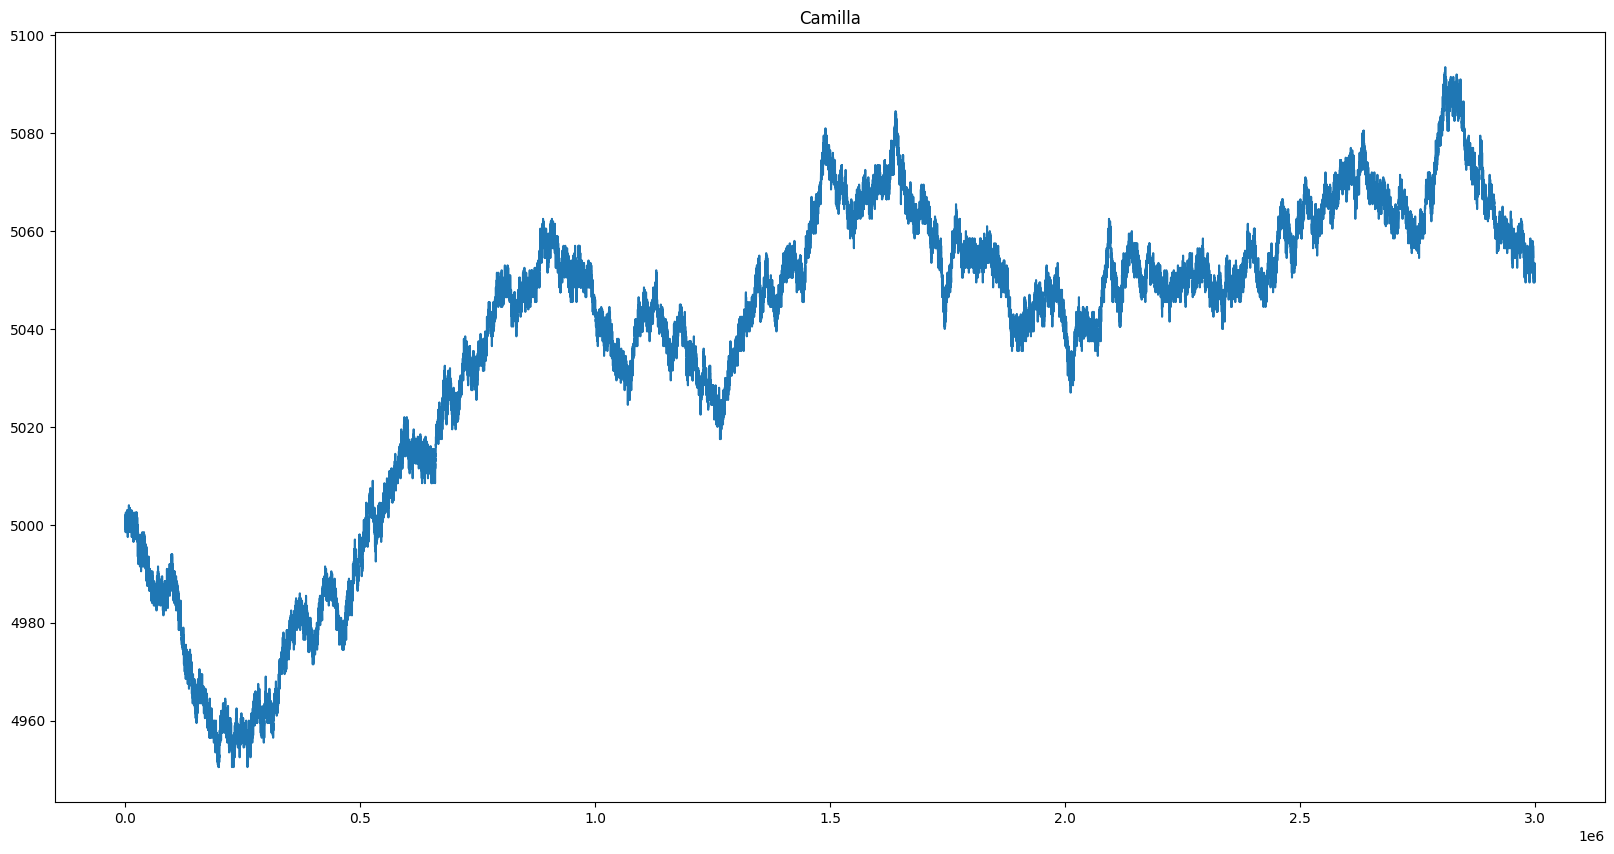

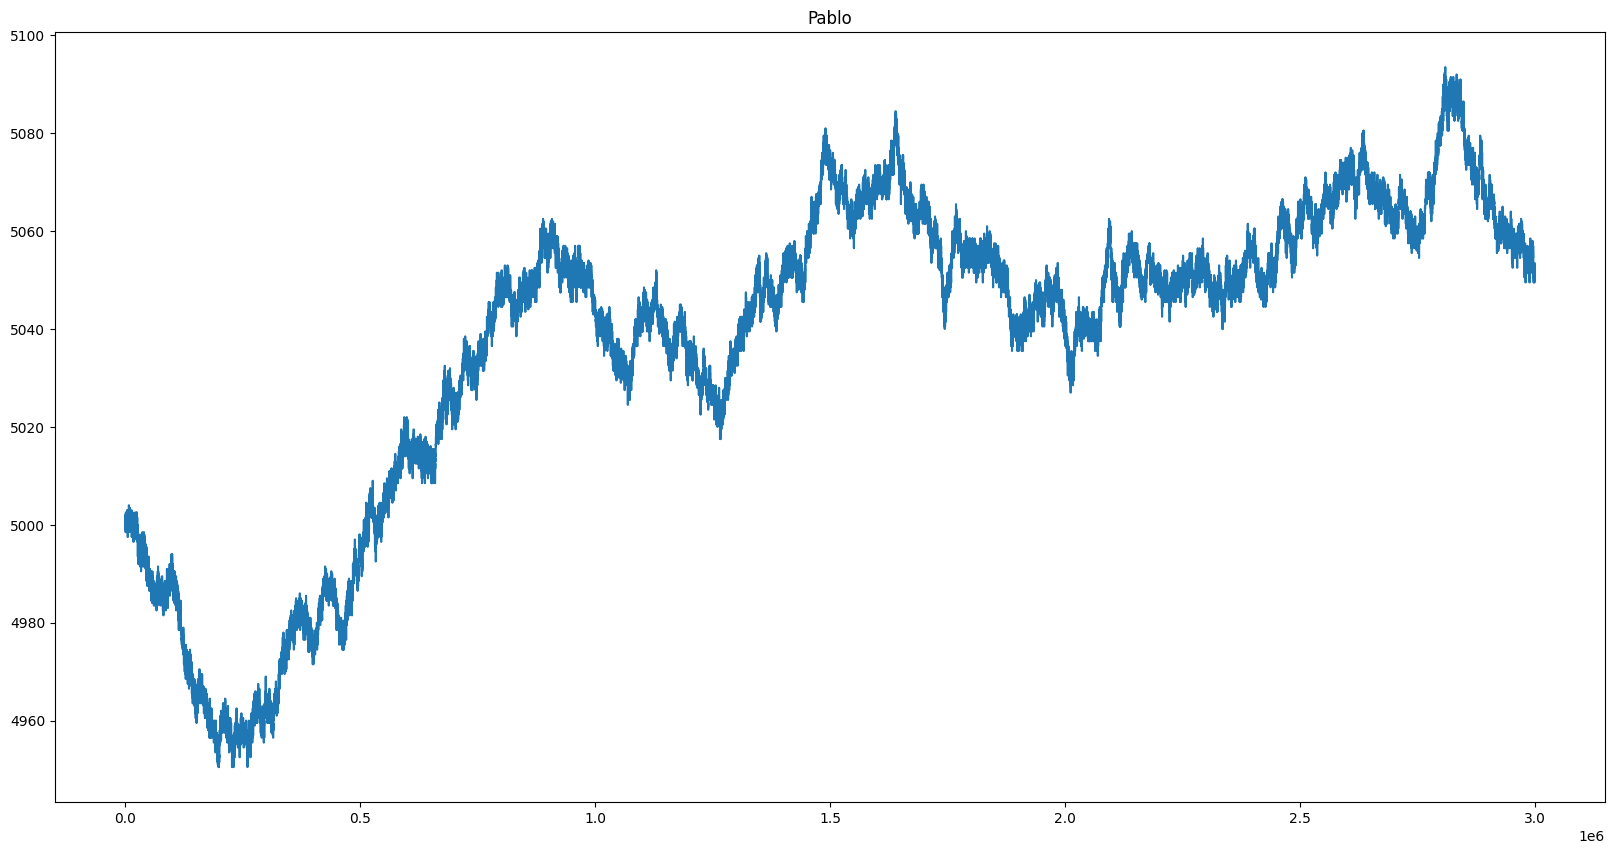

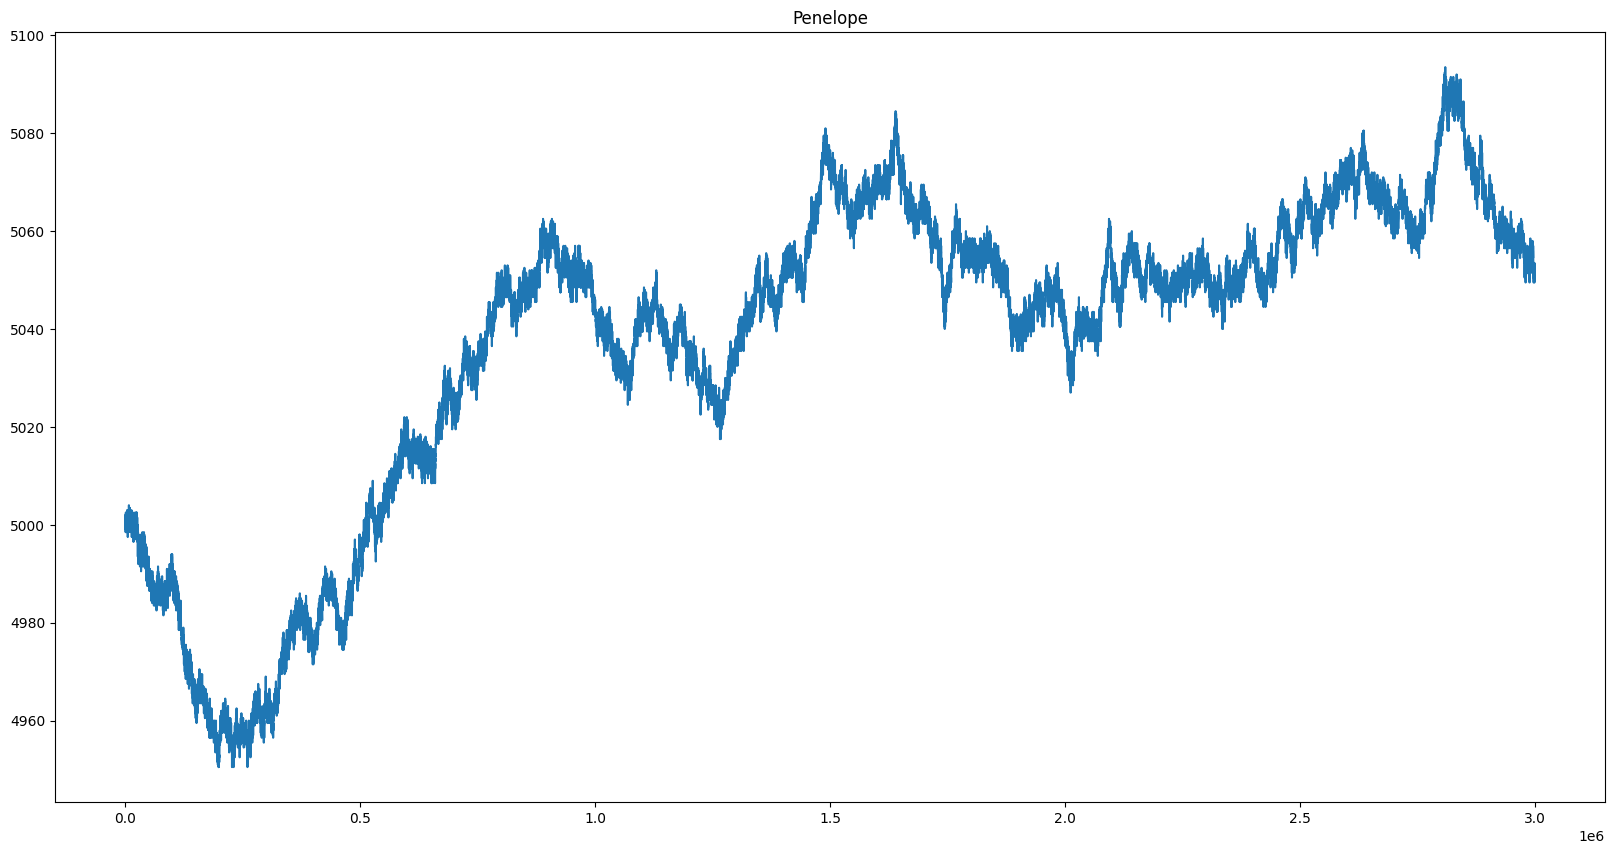

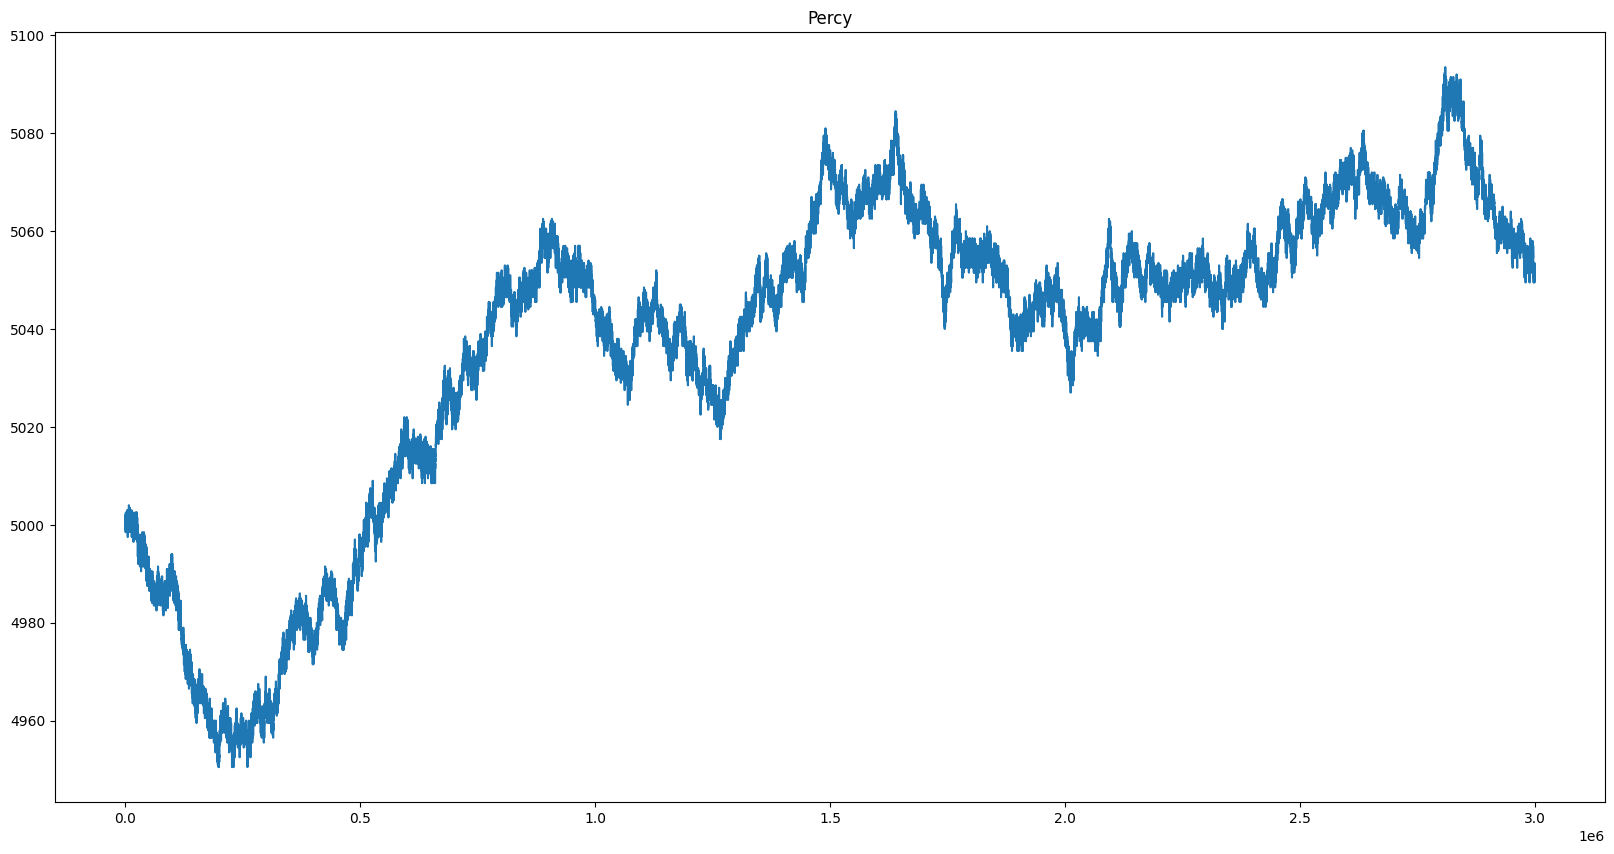

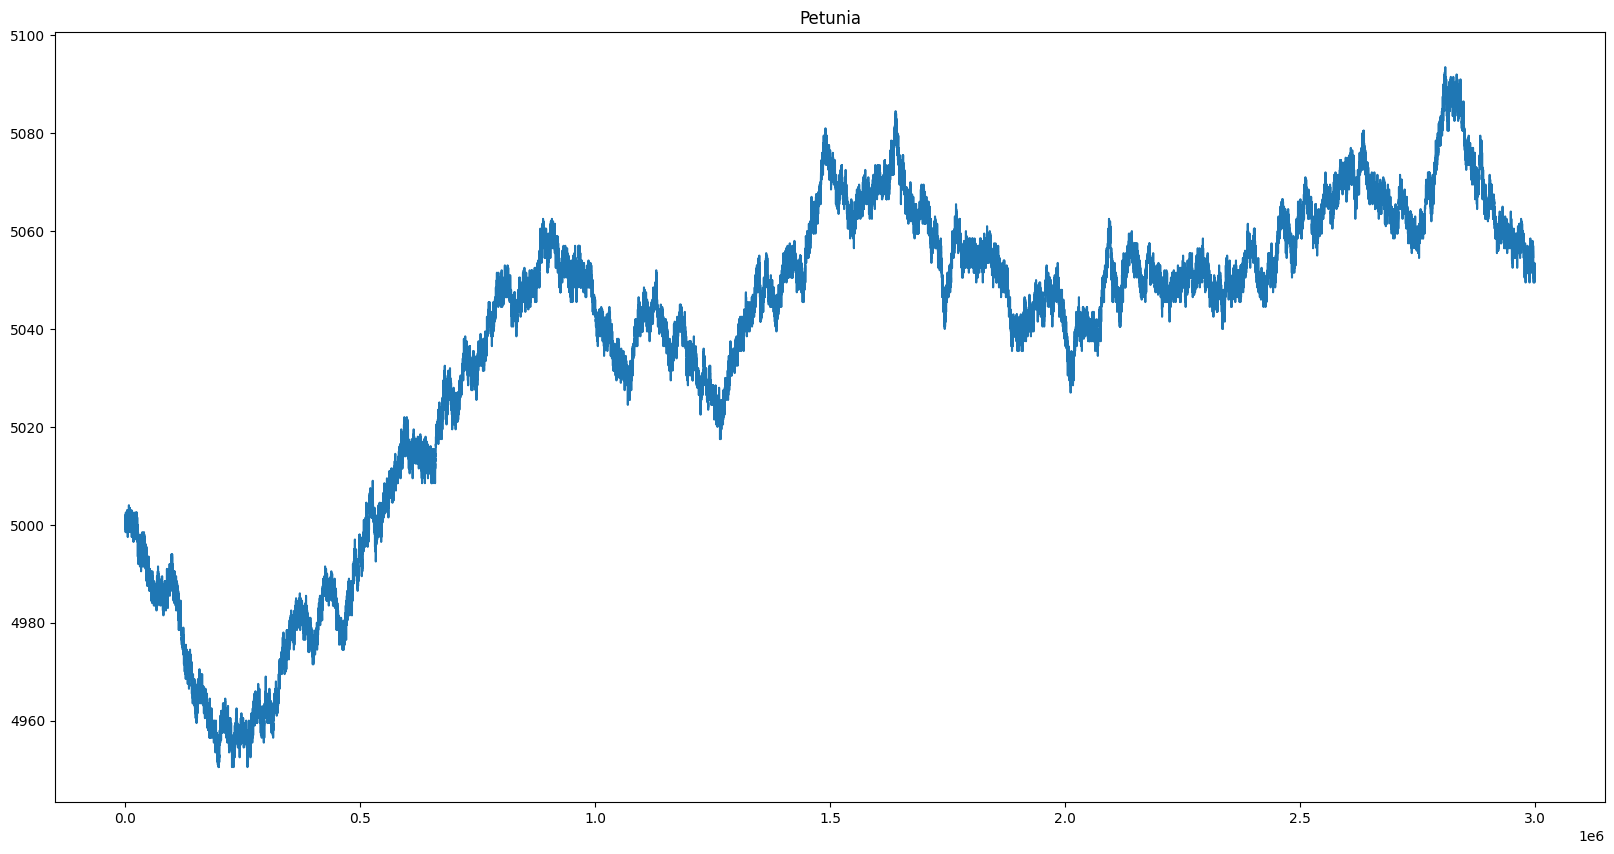

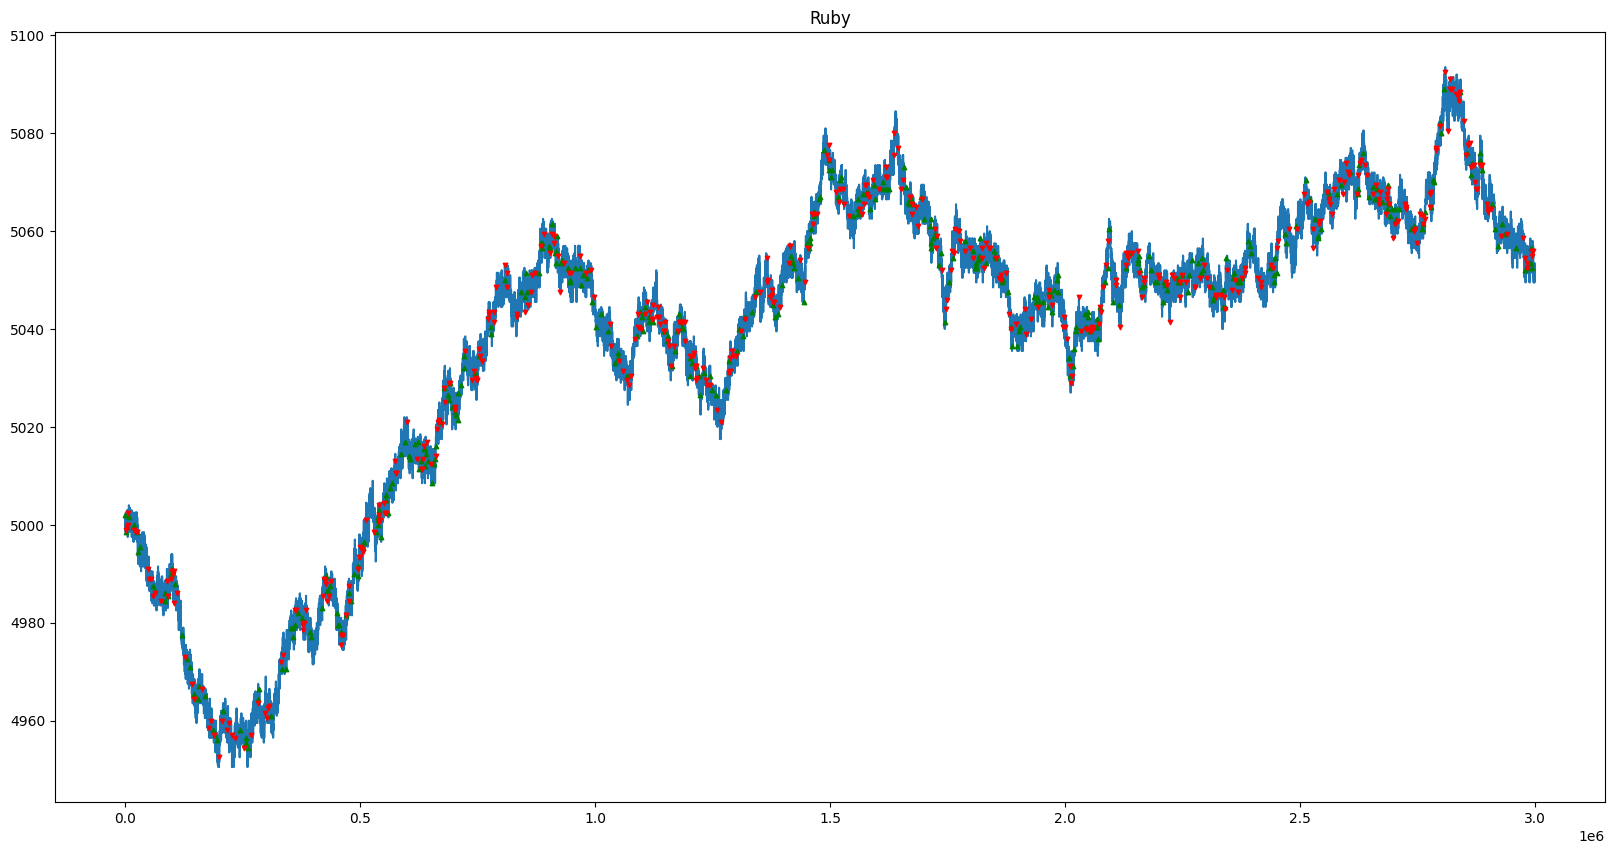

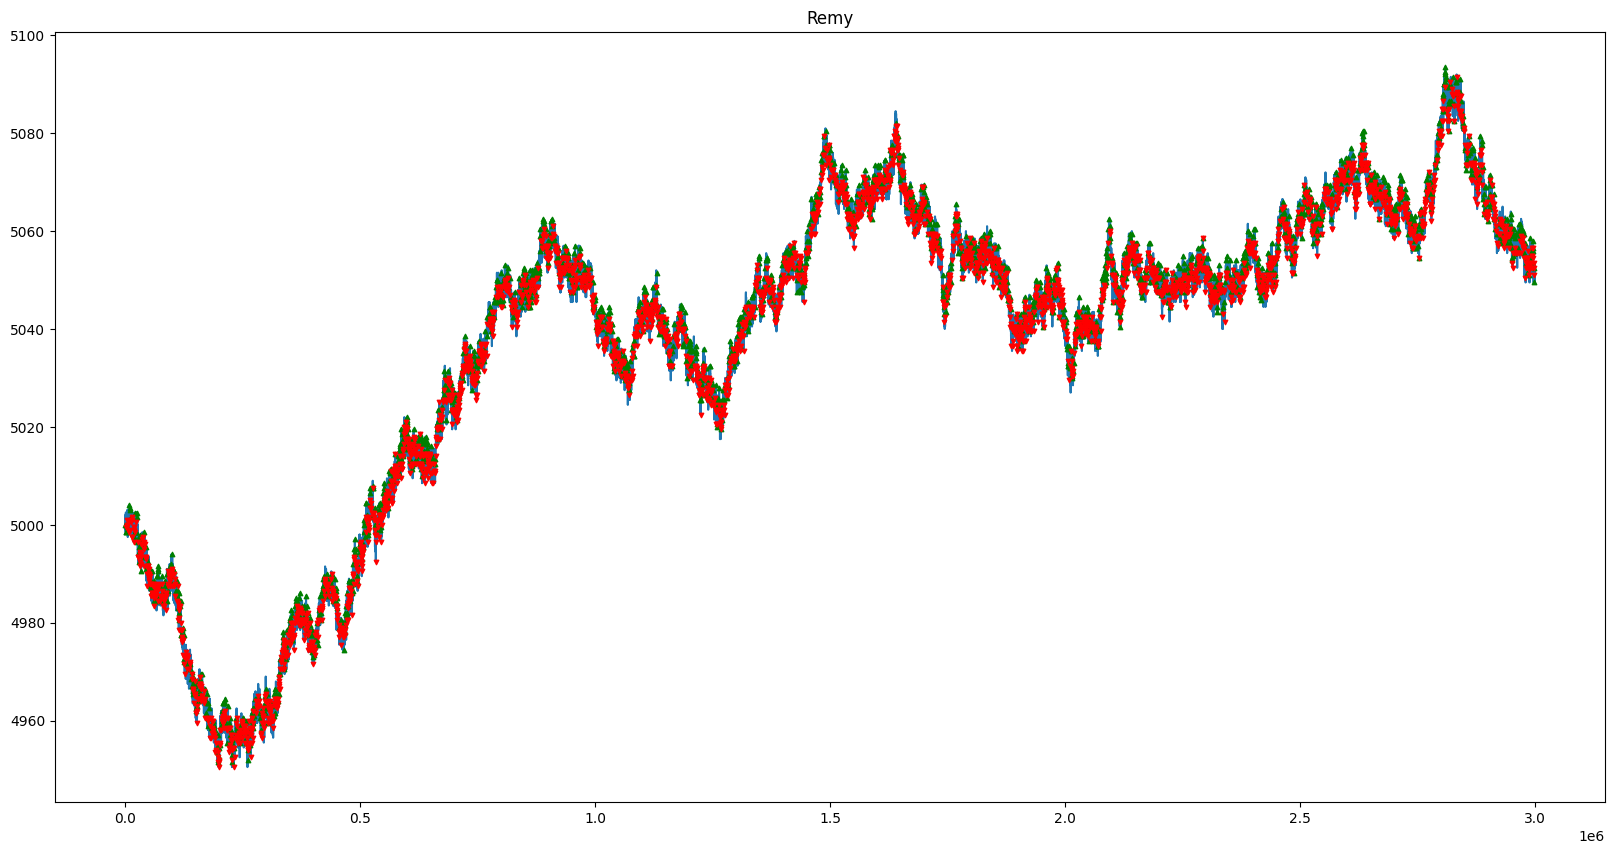

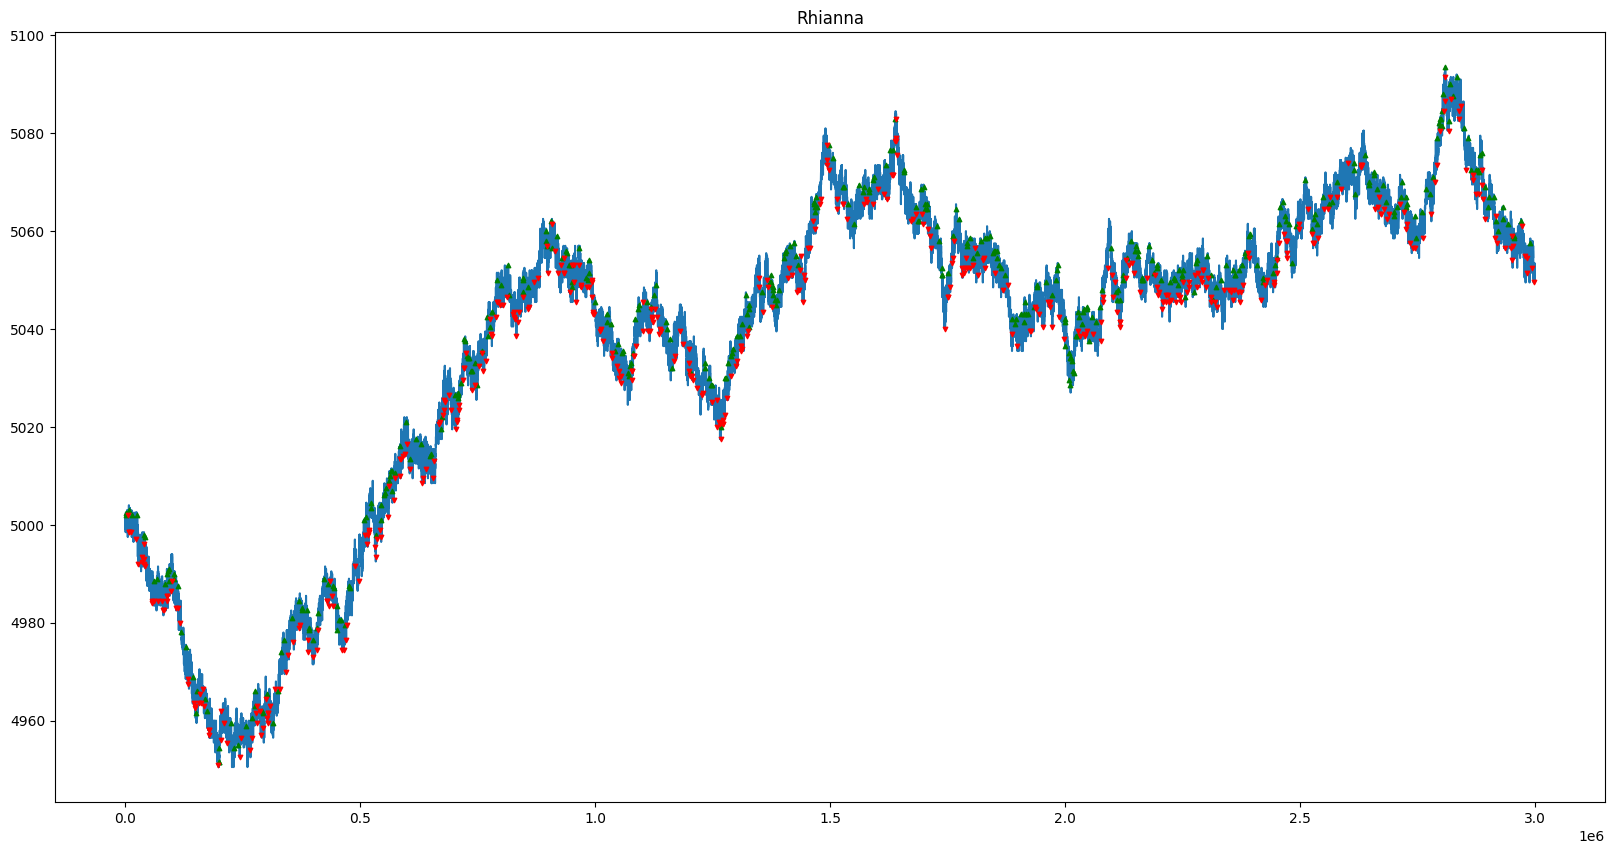

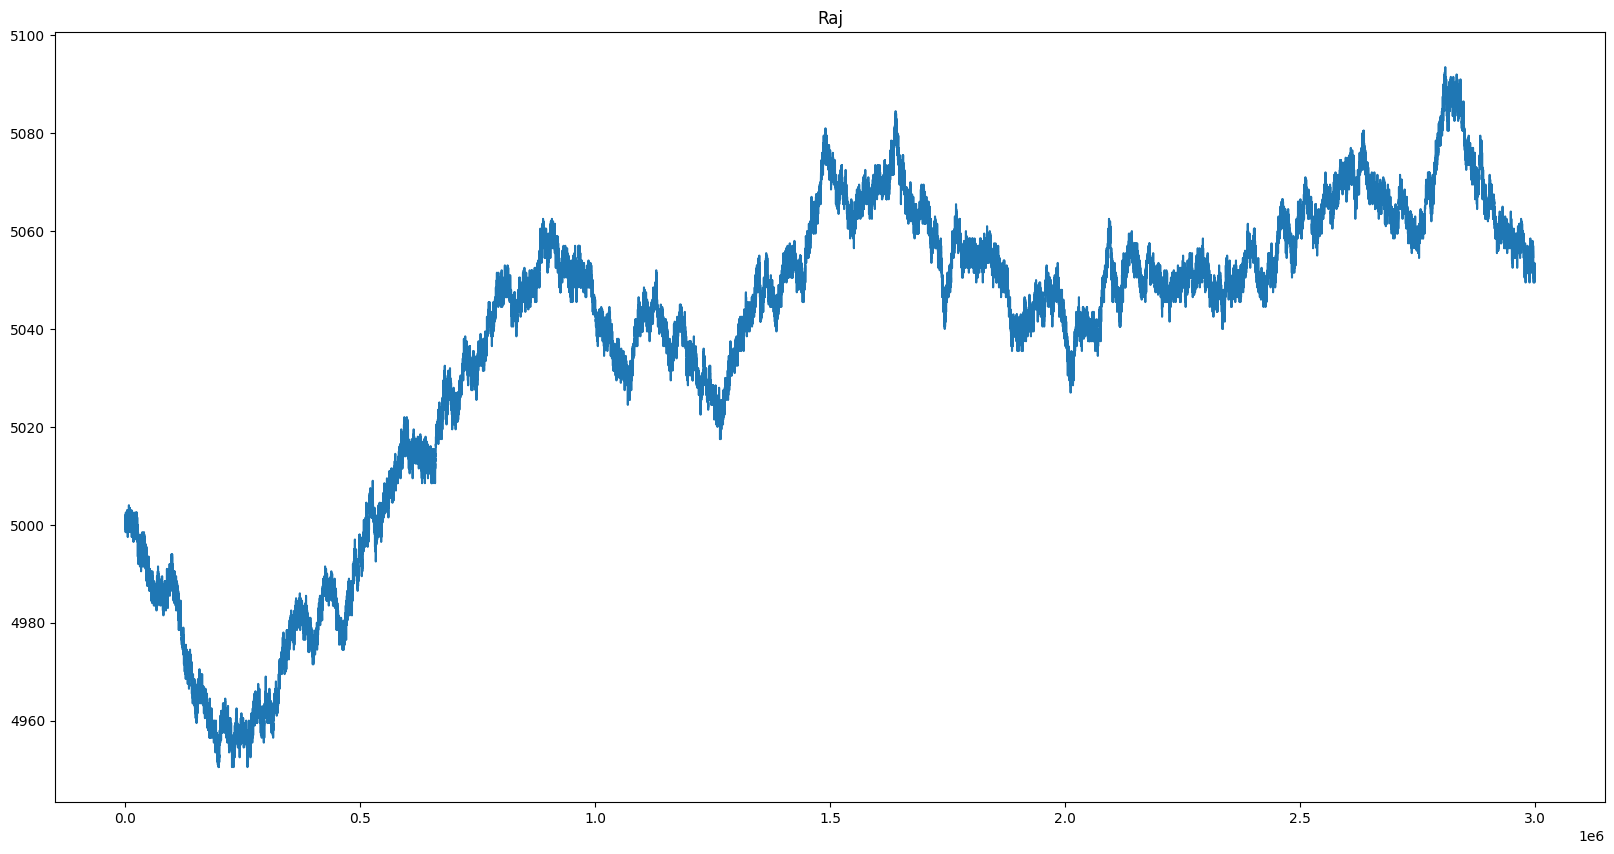

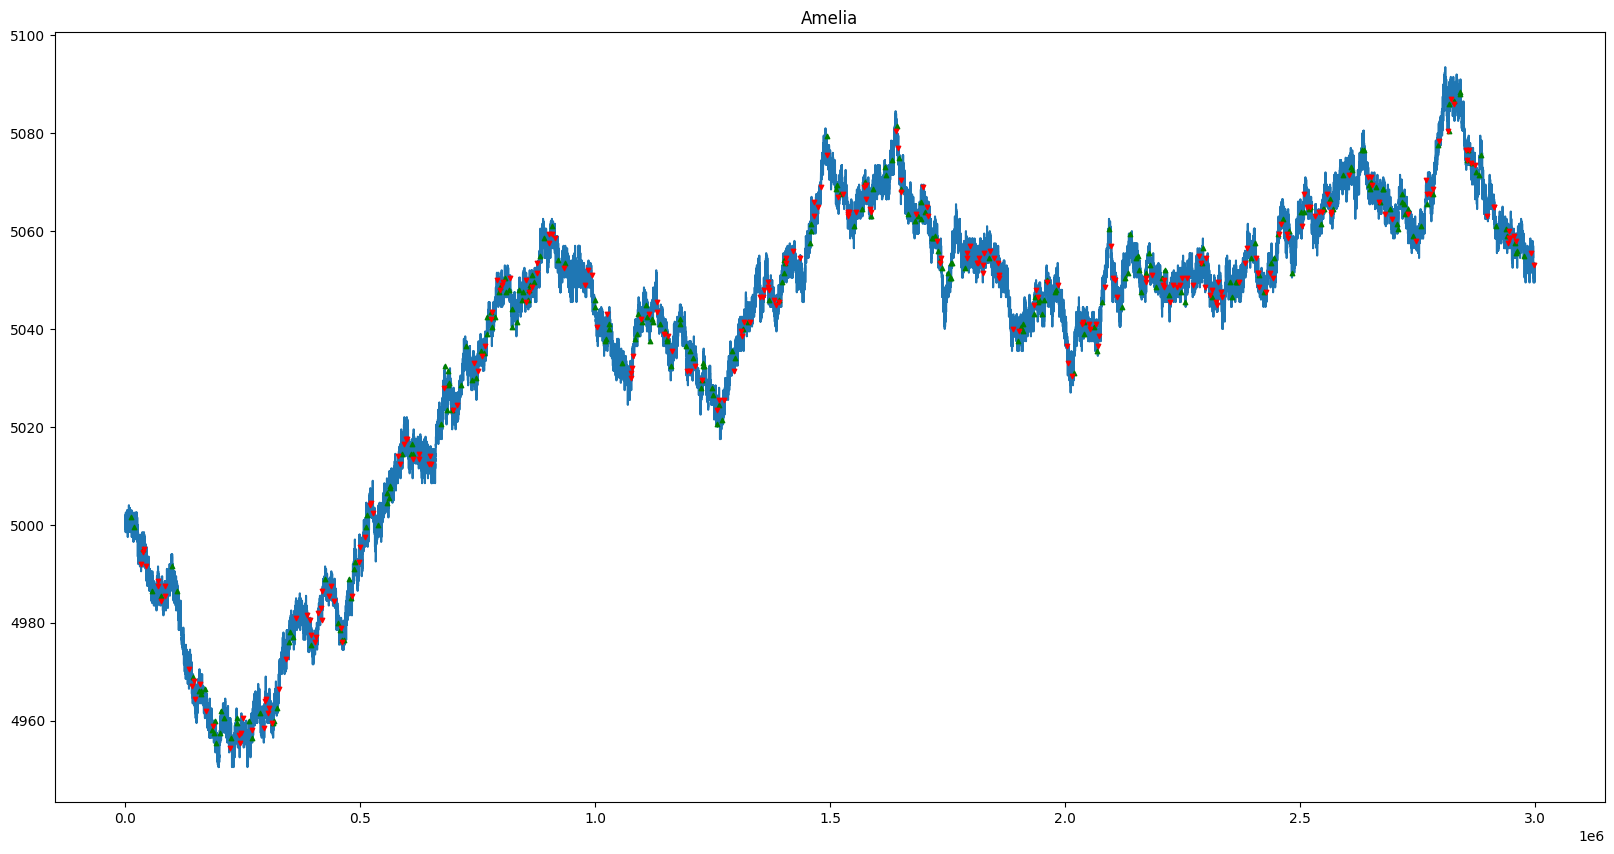

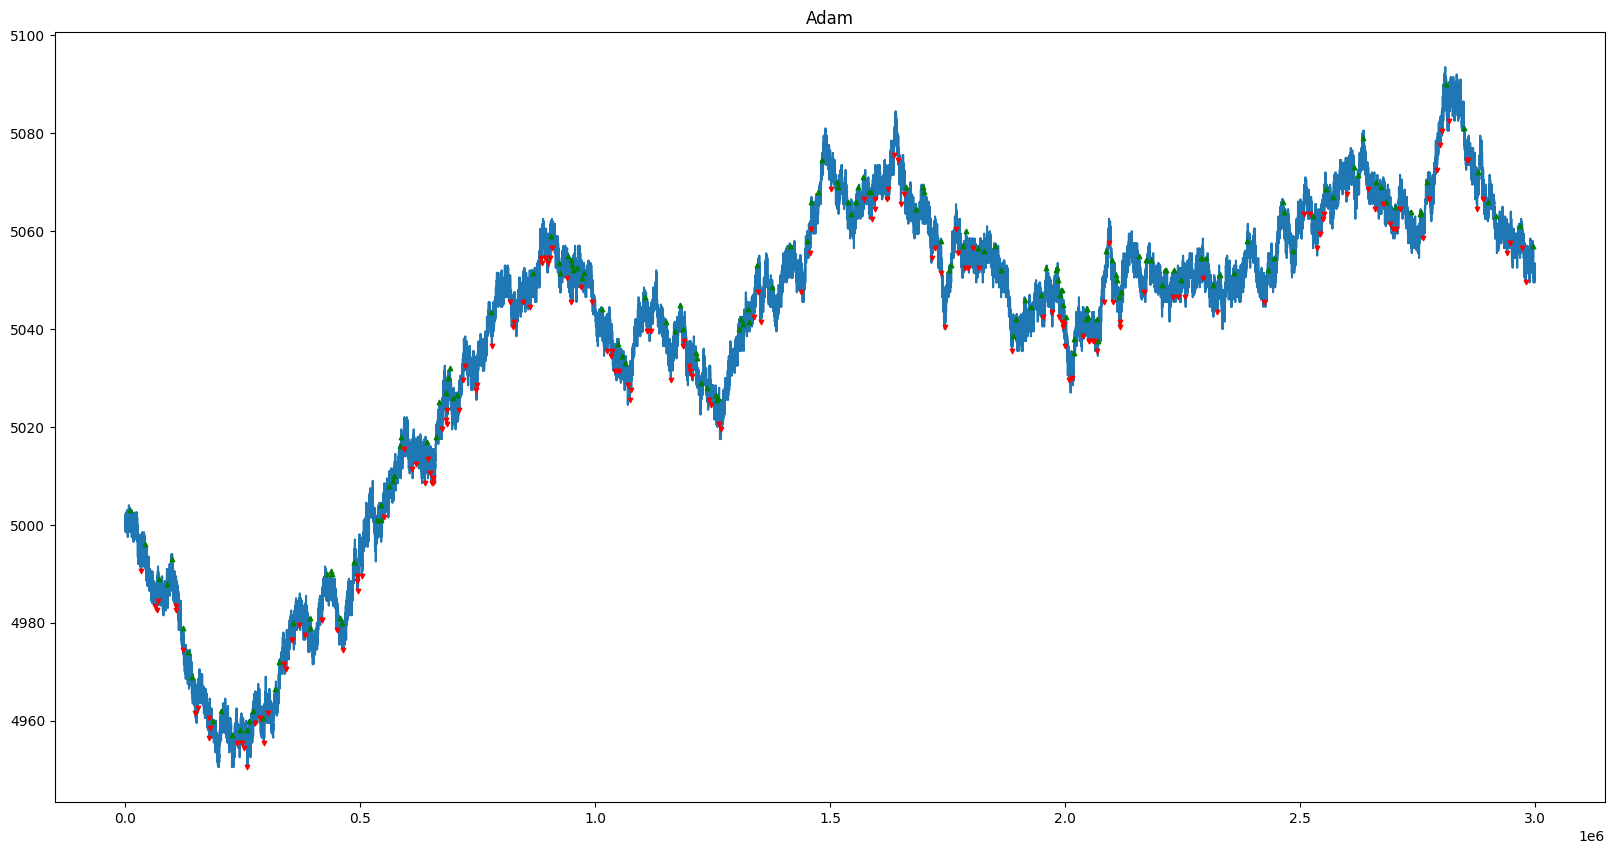

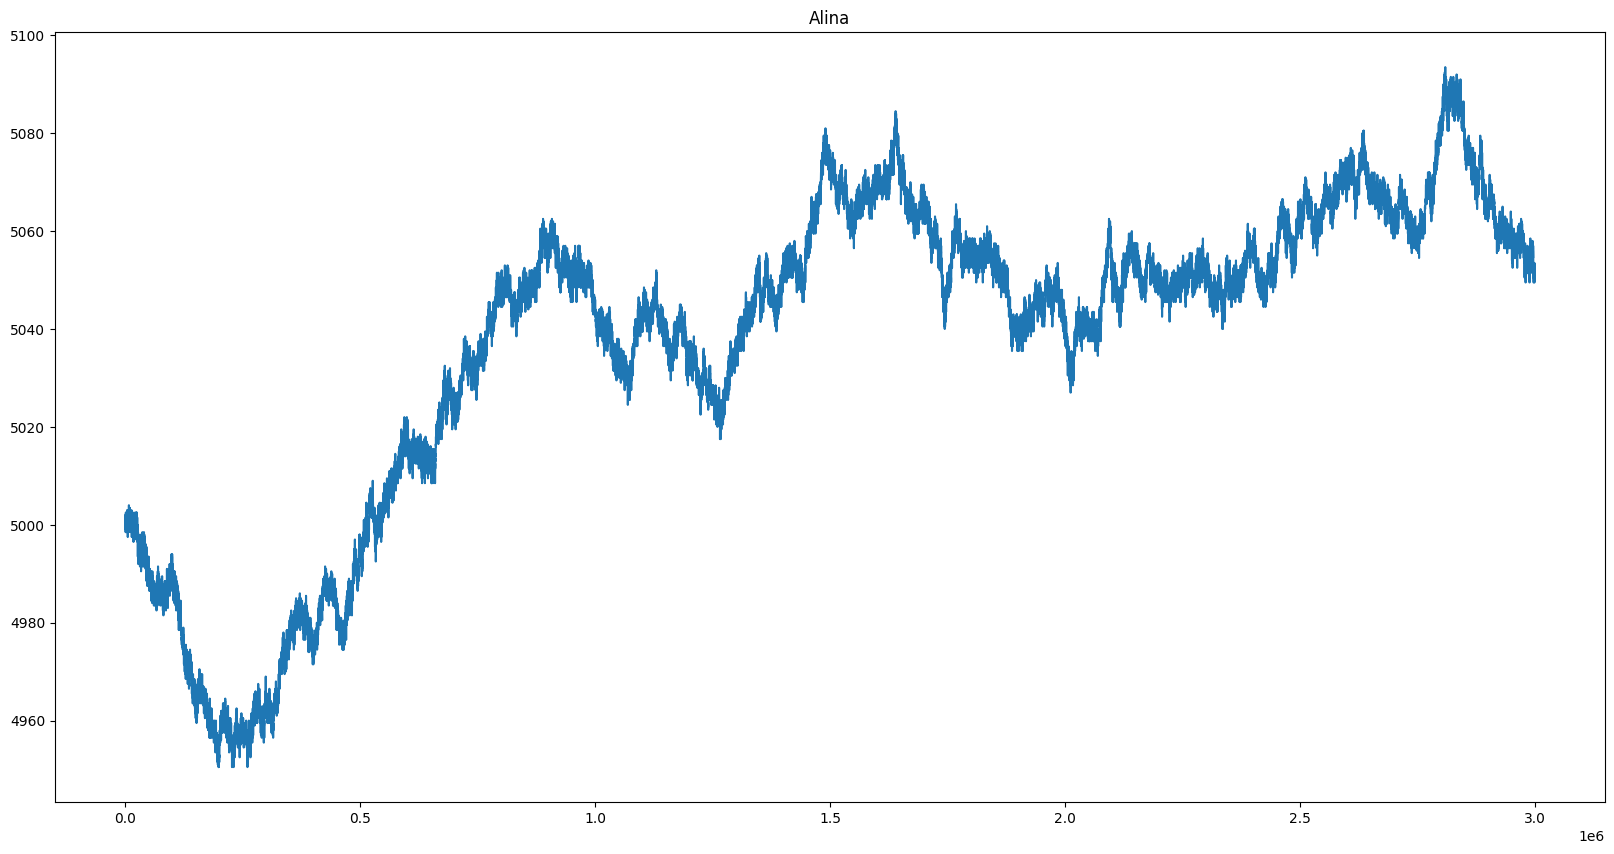

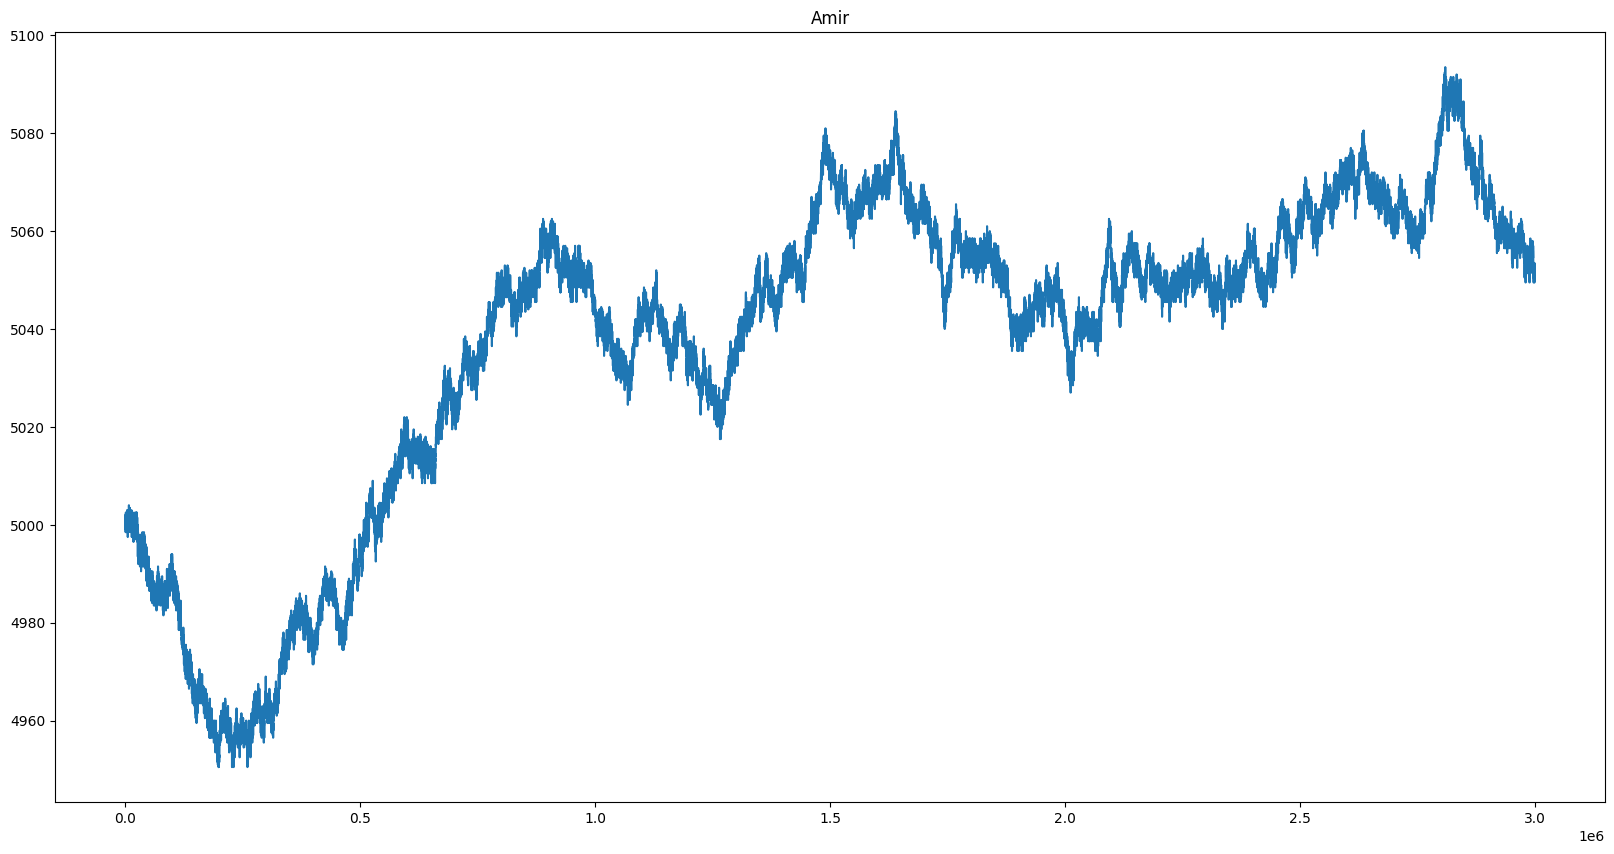

In [10]:
traders = ["Valentina", "Vinnie", "Vladimir", "Vivian", "Celeste", "Colin", "Carlos", "Camilla", "Pablo", "Penelope", "Percy", "Petunia", "Ruby", "Remy", "Rhianna", "Raj", "Amelia", "Adam", "Alina", "Amir"]
for trader in traders:
    timestamps = starfruit_trades[starfruit_trades["seller"] == trader]["timestamp"]
    starfruit_trader_sells = []
    for i, row in starfruit_prices.iterrows():
        if row["timestamp"] in timestamps.values:
            starfruit_trader_sells.append(row)
    
    sells_timestamps = [x["timestamp"] for x in starfruit_trader_sells]
    sells_prices = [x["mid_price"] for x in starfruit_trader_sells]

    timestamps = starfruit_trades[starfruit_trades["buyer"] == trader]["timestamp"]
    starfruit_trader_buys = []
    for i, row in starfruit_prices.iterrows():
        if row["timestamp"] in timestamps.values:
            starfruit_trader_buys.append(row)
    
    buys_timestamps = [x["timestamp"] for x in starfruit_trader_buys]
    buys_prices = [x["mid_price"] for x in starfruit_trader_buys]

    if len(buys_timestamps) == 0 and len(sells_timestamps) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title(f"{trader}")
    ax.plot(starfruit_prices["timestamp"], starfruit_prices["mid_price"])
    ax.scatter(sells_timestamps, sells_prices, c = "r", s=10, marker = "v", zorder=10)
    ax.scatter(buys_timestamps, buys_prices, c = "g", s = 10, marker="^", zorder=9)